# Custom Dataset (VggNet, ResNet) 학습

## VGG16


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* 필요한 라이브러리 불러오기

In [2]:
import os
import cv2
# computer vision을 위한 라이브러리
import numpy as np
import tensorflow as tf
import random as rn
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

* 학습용 반도체 공정 데이터 불러오기

In [4]:
groups_folder_path = '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/'
# 각 image가 존재하는 주소
categories = ['01_SPOT','20_LSAC','23_RING']
# 각 image의 종류
num_classes = len(categories)
# 전체 종류의 갯수

* 폴더에 있는 image 경로를 한장씩 가져와서 X, Y로 분리 

In [5]:
img_url = []
Y = []
  
for idex, category in enumerate(categories):
    # 위에서 지정한 categories를 index와 함께 가져온다.
    label = [0 for i in range(num_classes)] # -> [0, 0, 0]
    # categories의 갯수만큼 0을 채운 label list를 만든다. → [0, 0, 0]
    label[idex] = 1
    # 해당 index의 label만 1로 채운다 : one-hot encoding → [1, 0, 0] or [0, 1, 0] or [0, 0, 1]
  
    image_dir = groups_folder_path + category + '/'
    # 해당하는 이미지 경로
  
    for top, dir, f in os.walk(image_dir):
      # (root, dirs, files)
        for filename in f:
        # 이미지 명 만 가져온다
 #           print(image_dir+filename)
            url = image_dir+filename
            # 경로 + 해당 이미지 : 각각의 이미지까지의 모든 경로를 가져온다.
            img_url.append(url)
            Y.append(label)

In [6]:
img_url[-5:]

['/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/89.jpg',
 '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/92.jpg',
 '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/70.jpg',
 '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/97.jpg',
 '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/8.jpg']

In [7]:
Y[:5]

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]

In [8]:
Y[-5:]

[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]

In [9]:
len(img_url)

804

In [10]:
len(Y)

804

* 이미지 1장에 대해 불러오고 사이즈 조절

In [11]:
img = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/01_SPOT/1.jpg')

* 이미지 확인 : 480x480 size

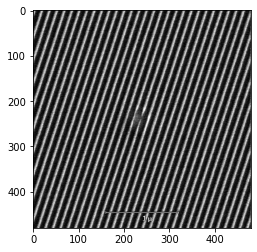

In [12]:
plt.imshow(img)

In [13]:
img.shape

(480, 480, 3)

In [14]:
img2 = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/20_LSAC/1.jpg')

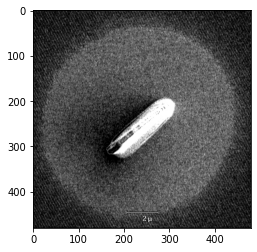

In [15]:
plt.imshow(img2)

In [16]:
img3 = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/1.jpg')

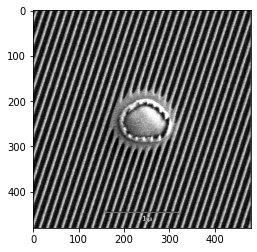

In [17]:
plt.imshow(img3)

* 모든 이미지에 224x224 resize 적용 후 재 저장 : but 사이즈 조절이 안되는 이미지는 예외처리 → 시간이 걸림.
    - 아래는 한장만 실험적으로 진행

In [18]:
X =[]
for i, url in enumerate(img_url):
    try:
        img = cv2.imread(url)
        img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
      # re_url = '새로 저장하고자 하는 경로'
      # cv2.imwrite(re_url, img) 
      # 위와 같이 두줄을 적어주면, 이미지 사이즈를 조정한 이후 저장한다.
        X.append(img)
    except: # 예외처리
        print(i)
    break

* 이미지 확인

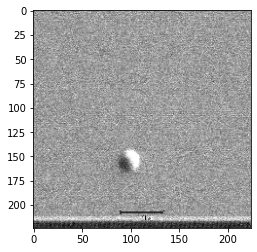

In [19]:
plt.imshow(X[0])

In [20]:
X[0].shape

(224, 224, 3)

* 사전에 이미지 전체에 대해 resize 작업을 진행하여 저장해둔 폴더에서 이미지 다시 업로드

In [21]:
groups_folder_path = '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/RE_IPTCL_CELL_TRAIN/'
# 각 image가 존재하는 주소
categories = ['01_SPOT','20_LSAC','23_RING']
# 각 image의 종류
num_classes = len(categories)
# 전체 종류의 갯수

In [22]:
Y = []
X = []
for idex, category in enumerate(categories):
    # 위에서 지정한 categories를 index와 함께 가져온다.
    label = [0 for i in range(num_classes)]
    # categories의 갯수만큼 0을 채운 label list를 만든다.
    label[idex] = 1
    # 해당 index의 label만 1로 채운다 : one-hot encoding
  
    image_dir = groups_folder_path + category + '/'
    # 해당하는 이미지 경로
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
        # 이미지 명
 #           print(image_dir+filename)
            url = image_dir+filename
            # 경로 + 해당 이미지
            img = cv2.imread(url)
            X.append(img)
            Y.append(label)

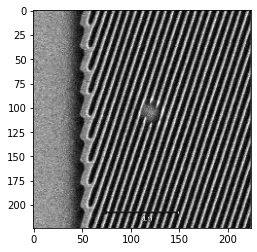

In [23]:
plt.imshow(X[0])

In [24]:
X[0].shape

(224, 224, 3)

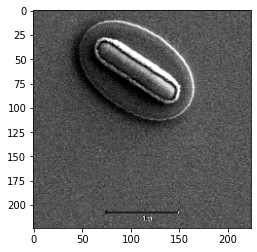

In [25]:
plt.imshow(X[-1])

* 위와 동일하게 테스트용 반도체 공정 데이터 불러오기

In [26]:
groups_folder_path_test = '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/RE_IPTCL_CELL_TEST/'
# 각 image가 존재하는 주소
categories_test = ['01_SPOT','20_LSAC','23_RING']
# 각 image의 종류
num_classes_test = len(categories_test)
# 전체 종류의 갯수

In [27]:
X_test = []
Y_test = []
  
for idex, category in enumerate(categories_test):
    label = [0 for i in range(num_classes_test)]
    label[idex] = 1
    image_dir = groups_folder_path_test + category + '/'
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
      #      print(image_dir+filename)
            url_test = image_dir+filename
            img_test = cv2.imread(url_test)
            X_test.append(img_test)
            Y_test.append(label)

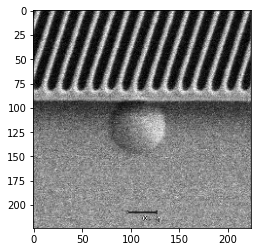

In [28]:
plt.imshow(X_test[0])

In [29]:
X_test[0].shape

(224, 224, 3)

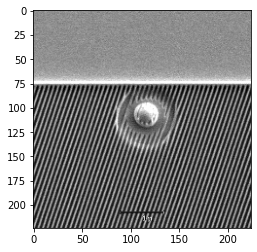

In [30]:
plt.imshow(X_test[-1])

* 학습용 & 테스트용 데이터 분리

In [31]:
len(X), len(Y)

(804, 804)

In [32]:
X = np.array(X)
# np.array 형태로 변경
Y = np.array(Y)

In [33]:
test_images = np.array(X_test)
test_oh_labels = np.array(Y_test)

In [34]:
tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(X, Y, test_size=0.30, random_state=42)

In [35]:
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(562, 224, 224, 3) (562, 3) (242, 224, 224, 3) (242, 3) (303, 224, 224, 3) (303, 3)


In [36]:
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(562, 224, 224, 3) (562, 3) (242, 224, 224, 3) (242, 3) (303, 224, 224, 3) (303, 3)


* 데이터 부족을 극복하기 위해 Augmentation 적용

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
 #   rotation_range=20,
 #   zoom_range=(0.7, 0.9),
 #   horizontal_flip=True,
 #   vertical_flip=True,
    rescale=1/255.0
)

valid_generator = ImageDataGenerator(rescale=1/255.0)

In [38]:
BATCH_SIZE = 8

In [39]:
flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)
flow_val_gen = valid_generator.flow(val_images, val_oh_labels, batch_size=BATCH_SIZE, shuffle=True)

##### VGG16에 학습

실행 구간 먼저 실행 : shift+enter

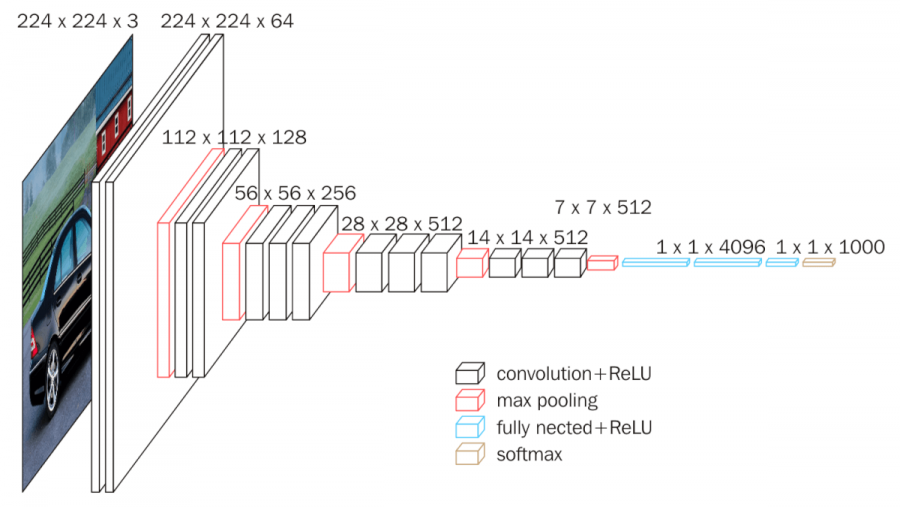

In [40]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/VGG16.png')

* 앞서 구현한 model

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_vggnet(in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)




    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 200, activation = 'relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 100, activation = 'relu')(x)
    x = Dropout(0.3)(x)
    # 마지막 softmax 층 적용. 
    output = Dense(units = n_classes, activation = 'softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

In [42]:
model = create_vggnet(in_shape=(224, 224, 3), n_classes=3)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
IMAGE_SIZE = 224
BATCH_SIZE = 8

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

In [45]:
history = model.fit(flow_tr_gen, epochs=20,
                    validation_data=flow_val_gen, 
                    batch_size=BATCH_SIZE,
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/20
71/71 [==============================] - 19s 96ms/step - loss: 1.0782 - accuracy: 0.4217 - val_loss: 1.0920 - val_accuracy: 0.5083 - lr: 1.0000e-04
Epoch 2/20
71/71 [==============================] - 6s 87ms/step - loss: 1.0001 - accuracy: 0.5178 - val_loss: 0.8744 - val_accuracy: 0.6322 - lr: 1.0000e-04
Epoch 3/20
71/71 [==============================] - 6s 88ms/step - loss: 0.9504 - accuracy: 0.5249 - val_loss: 0.8883 - val_accuracy: 0.5950 - lr: 1.0000e-04
Epoch 4/20
71/71 [==============================] - 6s 86ms/step - loss: 0.9526 - accuracy: 0.5427 - val_loss: 0.8073 - val_accuracy: 0.5909 - lr: 1.0000e-04
Epoch 5/20
71/71 [==============================] - 6s 85ms/step - loss: 0.7688 - accuracy: 0.6174 - val_loss: 0.6717 - val_accuracy: 0.6198 - lr: 1.0000e-04
Epoch 6/20
71/71 [==============================] - 6s 86ms/step - loss: 0.7509 - accuracy: 0.6335 - val_loss: 0.7887 - val_accuracy: 0.5909 - lr: 1.0000e-04
Epoch 7/20
71/71 [==============================] -

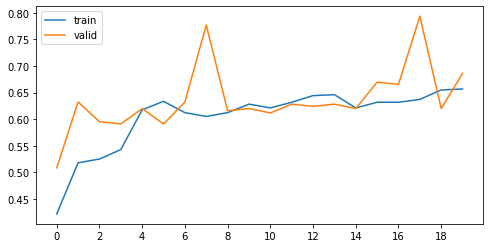

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8, 4))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.xticks(np.arange(0, 30, 2))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [ ]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

38/38 [==============================] - 1s 30ms/step - loss: 0.5972 - accuracy: 0.7360


[0.5971720218658447, 0.735973596572876]

##### ResNet50에 학습

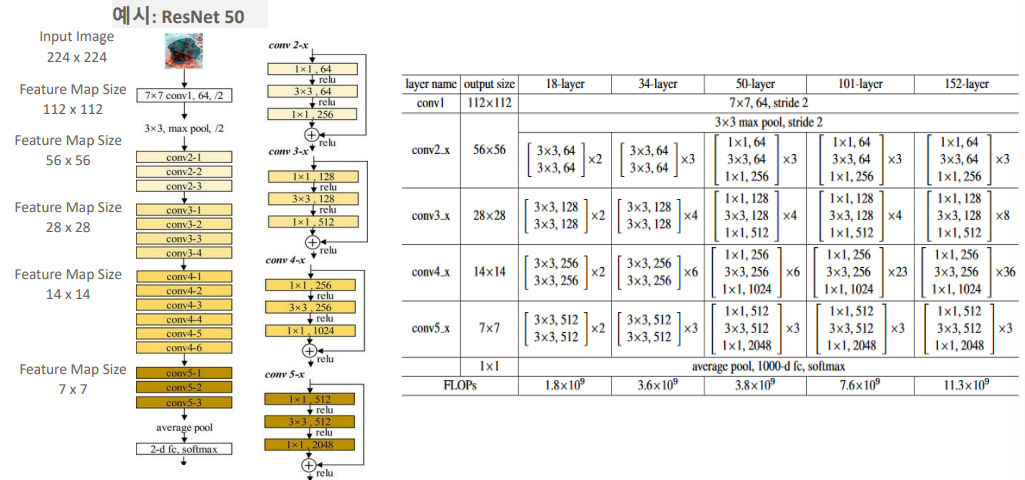

In [47]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/res_stage.png')

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation
from tensorflow.keras.layers import add, Add

def identity_block(input_tensor, middle_kernel_size, filters, stage, block):
    # 위의 block을 생성하는 함수
    '''
    함수 입력 인자 설명
    input_tensor는 입력 tensor
    middle_kernel_size 중간에 위치하는 kernel 크기. identity block내에 있는 두개의 conv layer중 1x1 kernel이 아니고, 3x3 kernel임. 
    3x3 커널이 이외에도 5x5 kernel도 지정할 수 있게 구성. 
    filters: 3개 conv layer들의 filter개수를 list 형태로 입력 받음. 첫번째 원소는 첫번째 1x1 filter 개수, 두번째는 3x3 filter 개수, 세번째는 마지막 1x1 filter 개수
    stage: identity block들이 여러개가 결합되므로 이를 구분하기 위해서 설정. 동일한 filter수를 가지는 identity block들을  동일한 stage로 설정.  
    block: 동일 stage내에서 identity block을 구별하기 위한 구분자
    ''' 
    

    filter1, filter2, filter3 = filters
    # filters로 list 형태로 입력된 filter 개수를 각각 filter1, filter2, filter3로 할당. 
    # filter은 첫번째 1x1 filter 개수, filter2는 3x3 filter개수, filter3는 마지막 1x1 filter개수
    # ex) [64, 64, 256]

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # 각 layer 별로 이름을 부여하기 위해서 name_base
    # stage는 각 layer 덩어리 총 4개의 stage로 구성
    
    x = Conv2D(filters=filter1, kernel_size=(1, 1), kernel_initializer='he_normal', name=conv_name_base+'2a')(input_tensor)
    # 첫번째 1x1 Conv->Batch Norm->Relu 수행. 
    

    x = BatchNormalization(axis=3, name=bn_name_base+'2a')(x)
    # Batch Norm적용. 입력 데이터는 batch 사이즈까지 포함하여 4차원임(batch_size, height, width, channel depth)임
    # Batch Norm의 axis는 channel depth에 해당하는 axis index인 3을 입력.(무조건 channel이 마지막 차원의 값으로 입력된다고 가정. )
   
    x = Activation('relu')(x)
    # ReLU Activation 적용.
    

    x = Conv2D(filters=filter2, kernel_size=middle_kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base+'2b')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2b')(x)
    x = Activation('relu')(x)
    # 두번째 3x3 Conv->Batch Norm->ReLU 수행
    
    
    x = Conv2D(filters=filter3, kernel_size=(1, 1), kernel_initializer='he_normal', name=conv_name_base+'2c')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2c')(x)
    # 마지막 1x1 Conv->Batch Norm 수행.
    
    x = Add()([input_tensor, x])
    # Residual Block 수행 결과와 input_tensor를 합한다. 
    # 또는 x = add([x, input_tensor]) 와 같이 구현할 수도 있음. 

    
    x = Activation('relu')(x)
    # 마지막으로 identity block 내에서 최종 ReLU를 적용
    
    return x

In [49]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input_tensor = Input(shape=(56, 56, 256), name='test_input')
# conv2 stage 

filters = [64, 64, 256]
# input_tensor의 channel수는 256개임. filters는 256의 1/4 filter수로 차원 축소후 다시 마지막 1x1 Conv에서 256으로 복원

kernel_size = (3, 3)
# 중간 Conv 커널 크기는 3x3

stage = 2
block = 'a'

In [50]:
def conv_block(input_tensor, middle_kernel_size, filters, stage, block, strides=(2, 2)):
    '''
    함수 입력 인자 설명
    input_tensor: 입력 tensor
    middle_kernel_size: 중간에 위치하는 kernel 크기. identity block내에 있는 두개의 conv layer중 1x1 kernel이 아니고, 3x3 kernel임. 
                        3x3 커널 이외에도 5x5 kernel도 지정할 수 있게 구성. 
    filters: 3개 conv layer들의 filter개수를 list 형태로 입력 받음. 첫번째 원소는 첫번째 1x1 filter 개수, 두번째는 3x3 filter 개수, 
             세번째는 마지막 1x1 filter 개수
    stage: identity block들이 여러개가 결합되므로 이를 구분하기 위해서 설정. 동일한 filter수를 가지는 identity block들을  동일한 stage로 설정.  
    block: 동일 stage내에서 identity block을 구별하기 위한 구분자
    strides: 입력 feature map의 크기를 절반으로 줄이기 위해서 사용. Default는 2이지만, 
             첫번째 Stage의 첫번째 block에서는 이미 입력 feature map이 max pool로 절반이 줄어있는 상태이므로 다시 줄이지 않기 위해 1을 호출해야함 
    ''' 
    
    filter1, filter2, filter3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    x = Conv2D(filters=filter1, kernel_size=(1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base+'2a')(input_tensor)
    x = BatchNormalization(axis=3, name=bn_name_base+'2a')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=filter2, kernel_size=middle_kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base+'2b')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2b')(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=filter3, kernel_size=(1, 1), kernel_initializer='he_normal', name=conv_name_base+'2c')(x)
    x = BatchNormalization(axis=3, name=bn_name_base+'2c')(x)
    
    shortcut = Conv2D(filter3, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base+'1')(input_tensor)
    shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(shortcut)

    x = add([x, shortcut])
    
    x = Activation('relu')(x)
    
    return x
# 위의 block과 동일한데, stride만 다르다

In [51]:
from tensorflow.keras.layers import ZeroPadding2D, MaxPooling2D

def do_first_conv(input_tensor):
    

    x = ZeroPadding2D(padding=(3, 3), name='conv1_pad')(input_tensor)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid', kernel_initializer='he_normal', name='conv')(x)
    x = BatchNormalization(axis=3, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    return x

In [52]:
def create_resnet(in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    
    #첫번째 7x7 Conv와 Max Polling 적용.  
    x = do_first_conv(input_tensor)
    
    # stage 2의 conv_block과 identity block 생성. stage2의 첫번째 conv_block은 strides를 1로 하여 크기를 줄이지 않음. 
    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    
    # stage 3의 conv_block과 identity block 생성. stage3의 첫번째 conv_block은 strides를 2(default)로 하여 크기를 줄임 
    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    # stage 4의 conv_block과 identity block 생성. stage4의 첫번째 conv_block은 strides를 2(default)로 하여 크기를 줄임
    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    # stage 5의 conv_block과 identity block 생성. stage5의 첫번째 conv_block은 strides를 2(default)로 하여 크기를 줄임
    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    
    # classification dense layer와 연결 전 GlobalAveragePooling 수행 
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu', name='fc_01')(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(n_classes, activation='softmax', name='fc_final')(x)
    
    model = Model(inputs=input_tensor, outputs=output, name='resnet50')
    model.summary()
    
    return model

In [53]:
model =  create_resnet(in_shape=(224,224,3), n_classes=3)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv (Conv2D)                  (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [54]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

In [55]:
history = model.fit(flow_tr_gen, epochs=20, 
                    validation_data=flow_val_gen,
                    batch_size=BATCH_SIZE,
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/20
71/71 [==============================] - 12s 96ms/step - loss: 1.7407 - accuracy: 0.4680 - val_loss: 1.5120 - val_accuracy: 0.3678 - lr: 1.0000e-04
Epoch 2/20
71/71 [==============================] - 6s 78ms/step - loss: 1.2644 - accuracy: 0.5285 - val_loss: 1.3560 - val_accuracy: 0.4050 - lr: 1.0000e-04
Epoch 3/20
71/71 [==============================] - 6s 78ms/step - loss: 0.9065 - accuracy: 0.6032 - val_loss: 1.5601 - val_accuracy: 0.3760 - lr: 1.0000e-04
Epoch 4/20
71/71 [==============================] - 6s 79ms/step - loss: 0.8459 - accuracy: 0.6388 - val_loss: 1.5499 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 5/20
71/71 [==============================] - 6s 78ms/step - loss: 0.7038 - accuracy: 0.7491 - val_loss: 1.0074 - val_accuracy: 0.6694 - lr: 1.0000e-04
Epoch 6/20
71/71 [==============================] - 6s 78ms/step - loss: 0.6563 - accuracy: 0.7722 - val_loss: 0.8995 - val_accuracy: 0.7645 - lr: 1.0000e-04
Epoch 7/20
71/71 [==============================] -

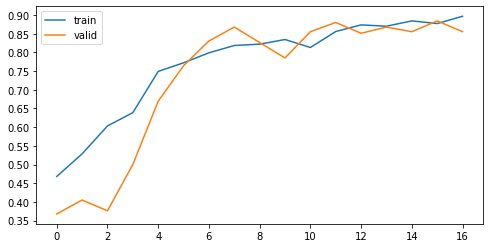

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(8, 4))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.xticks(np.arange(0, 30, 2))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [57]:
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(test_images, test_oh_labels, batch_size=BATCH_SIZE, shuffle=False)
model.evaluate(flow_test_gen)

38/38 [==============================] - 1s 33ms/step - loss: 0.5422 - accuracy: 0.8647


[0.5422311425209045, 0.8646864891052246]